In [1]:
%matplotlib inline
import os
import torch
from d2l import torch as d2l
import pandas as pd
import torchvision

d2l.DATA_HUB['banana-detection']=(d2l.DATA_URL+'banana-detection.zip','5de26c8fce5ccdea9f91267273464dc968d20d72')


In [6]:
def read_data_bananas(is_train=True):
    data_dir=d2l.download_extract('banana-detection')
    csv_fname=os.path.join(data_dir,'bananas_train' if is_train else 'bananas_val','label.csv')
    csv_data=pd.read_csv(csv_fname)
    csv_data=csv_data.set_index('img_name')
    images,datas=[],[]
    for name,data in csv_data.iterrows():
        images.append(torchvision.io.read_image(os.path.join(data_dir,'bananas_train' if is_train else 'bananas_val','images',f'{name}')))
        datas.append(list(data))
    return images,torch.tensor(datas).unsqueeze(1)/256

In [3]:
class BananasDataset(torch.utils.data.Dataset):
    def __init__(self,is_train):
        self.features,self.labels=read_data_bananas(is_train)
        print('read'+str(len(self.features))+ (' train examples' if is_train else ' validation examples'))
    
    def __getitem__(self,index):
        return (self.features[index].float(),self.labels[index].float())
    
    def __len__(self):
        return len(self.features)


In [4]:
def load_data_bananas(batch_size):
    train_iter=torch.utils.data.DataLoader(BananasDataset(is_train=True),batch_size=batch_size,shuffle=True)
    val_iter=torch.utils.data.DataLoader(BananasDataset(is_train=False),batch_size=batch_size,shuffle=False)
    return train_iter,val_iter

In [7]:
batch_size,edge_size=32,256
train_iter,_=load_data_bananas(batch_size)
batch=next(iter(train_iter))
batch[0].shape,batch[1].shape

read1000 train examples
read100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

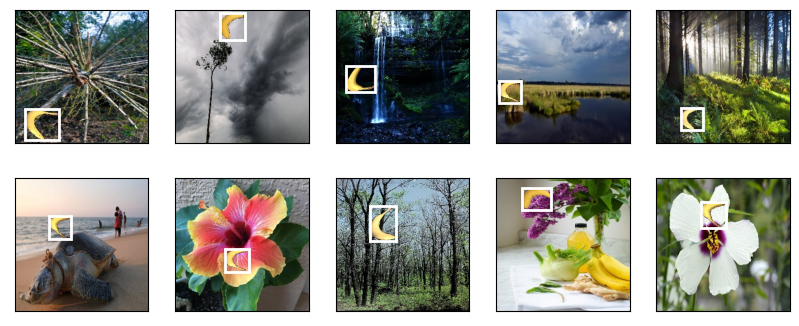

In [8]:
imgs=(batch[0][0:10].permute(0,2,3,1))/255
axes=d2l.show_images(imgs,2,5,scale=2)
for ax,label in zip(axes,batch[1][0:10]):
    d2l.show_bboxes(ax,[label[0][1:5]*edge_size],colors=['w'])